# non-linearly separable case

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Import data
txt_df = pd.read_csv('hw3_data2.txt', names=['class', 'x', 'y'])
print("The number of rows in data : {}".format(txt_df.shape[0]))
print("The number of columns in data : {}".format(txt_df.shape[1]))
print("The first few rows of the data:")
txt_df.head()

The number of rows in data : 3600
The number of columns in data : 3
The first few rows of the data:


,class,x,y
0,+,1.607874,9.247557
1,+,3.003258,6.610258
2,+,4.069008,18.327280
3,+,0.407198,14.835517
4,+,13.747305,8.219991


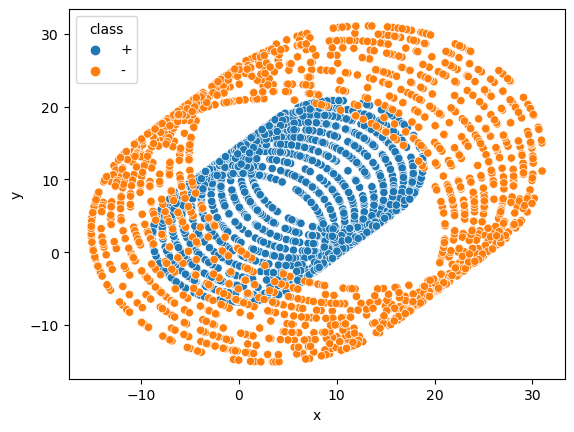

In [3]:
# Plotting the data
sns.scatterplot(data=txt_df, x="x", y="y", hue='class')
plt.show()

In [4]:
# Converting '+' class into 1 and '-' class into 0
txt_df['class'] = np.where(txt_df['class'] == '+',1,0)
txt_df.head(2)

,class,x,y
0,1,1.607874,9.247557
1,1,3.003258,6.610258


In [5]:
# Creating features and target datasets
X = txt_df[['x','y']]
y = txt_df[['class']]

In [6]:
# Function to calculate gradient
def gradientCalc(w, X1, Y1):
    if type(Y1) == np.float64:
        Y1 = np.array([Y1])
        X1 = np.array([X1])
    distance = 1 - (Y1 * np.dot(X1, w))
    dw = np.zeros(len(w))
    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = w
        else:
            di = w - (strength * Y1[ind] * X1[ind])
            dw += di
            dw = dw/len(Y1)  # average
    return dw

In [7]:
# Model training
svm = SVC(kernel = 'rbf', gamma=0.01)
svm.fit(X, y)

D:\Miniconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.01)

In [8]:
# Model prediction
y_pred = svm.predict(X)
y_pred
df_pred1 = pd.DataFrame(y_pred, columns = ['predicted_class'])
df_pred =  pd.concat([X, df_pred1], axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

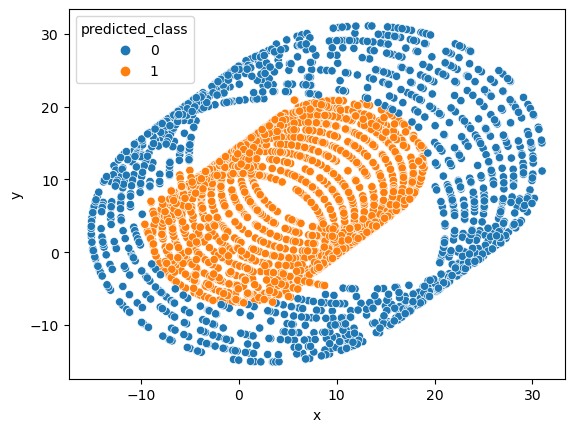

In [9]:
# Plotting the trained classifier data
sns.scatterplot(data=df_pred, x="x", y="y", hue="predicted_class")

In [10]:
#generalization error
confusion_matrix(y, y_pred)

array([[1410,  190],
       [   0, 2000]], dtype=int64)

In [11]:
# Model score
score = svm.score(X, y)
print("Model score is : ", round(score,2))

Model score is :  0.95
